C:\Users\Parthiban\AppData\Local\Temp\ipykernel_16268\2959906249.py:52: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update_plot, interval=1000, blit=True)


Starting minimal real-time PM2.5 data stream.


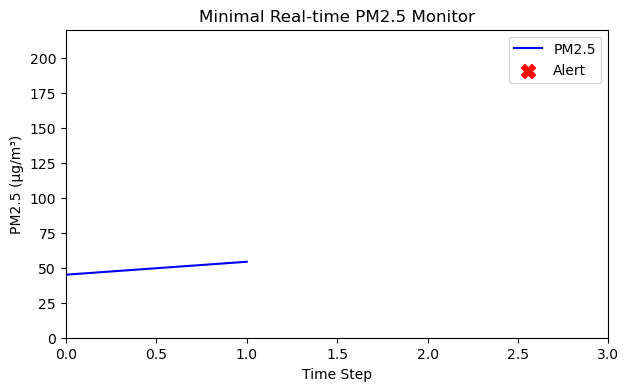

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from collections import deque
import random
import numpy as np

WINDOW_SIZE = 5
SPIKE_THRESHOLD_FACTOR = 1.5
HAZARDOUS_THRESHOLD = 90

data_history = deque(maxlen=50)
alert_data_x, alert_data_y = [], []

fig, ax = plt.subplots(figsize=(7, 4))
line, = ax.plot([], [], "b-", label="PM2.5")
alert_scatter = ax.scatter([], [], color="red", marker="X", s=100, zorder=5, label="Alert")
ax.set_title("Minimal Real-time PM2.5 Monitor")
ax.set_xlabel("Time Step")
ax.set_ylabel("PM2.5 (µg/m³)")
ax.set_ylim(0, 220)
ax.legend()

def update_plot(frame):
    if random.random() < 0.05:
        value = random.uniform(100, 200)
    else:
        value = random.uniform(20, 60)

    data_history.append(value)
    alert_data_x.clear()
    alert_data_y.clear()

    if len(data_history) > WINDOW_SIZE:
        current_avg = np.mean(list(data_history)[-WINDOW_SIZE-1:-1])
        if value > HAZARDOUS_THRESHOLD or value > current_avg * SPIKE_THRESHOLD_FACTOR:
            print(f"ALERT: Spike detected! Value: {value:.2f} µg/m³")
            alert_data_x.append(len(data_history) - 1)
            alert_data_y.append(value)

    x_data = list(range(len(data_history)))
    line.set_xdata(x_data)
    line.set_ydata(list(data_history))

    if alert_data_x:
        alert_scatter.set_offsets(np.c_[alert_data_x, alert_data_y])
    else:
        alert_scatter.set_offsets(np.empty((0, 2)))

    ax.set_xlim(max(0, len(data_history) - 50), len(data_history) + 1)
    return line, alert_scatter

ani = FuncAnimation(fig, update_plot, interval=1000, blit=True)
print("Starting minimal real-time PM2.5 data stream.")
plt.show()
